# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Moritz Roth

Datum: 19.11.2023

Gruppe: 12

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Wie wird der Transportkoeffizient durch die Temperaturdifferenz zwischen einem heissen und kalten medium beeinflusst?Kann das Newtonische Gesetzt Anhand unseres Versuches bestätigt werden?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


<img src="figures/IMG_4119.jpg" width="800">

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [6]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
path = "/home/pi/calorimetry_home/data/data_newton/data_newton.h5"

# DONE #

In [7]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
import h5py
sensor_data ={}
with h5py.File(path,'r') as file:
    # in raw data gehen
    raw_data_group = file['RawData']

    #Attribute der hdf5 Datei
    created_date = file.attrs.get('created')
    experiment = file.attrs.get('experiment')
    group_number = file.attrs.get('groupe_numbert')
    authors = file.attrs.get('authors')
    
    for sensor_uuid in raw_data_group:
        #auslesen der sensortemperaturen
        temperature_dataset = raw_data_group[sensor_uuid]['temperature']
        temperature = temperature_dataset[()]

        #Zeitschritte auslesen
        timestamp_dataset = raw_data_group[sensor_uuid]['timestamp']
        timestamp = timestamp_dataset[()]

        sensor_data[sensor_uuid] = {'temperature': temperature,'timestamp': timestamp}
file.close()        
print(sensor_data)        
        
# DONE #

{'1ee826bc-ad10-6fa9-818b-5b87707a5a35': {'temperature': array([22.125 , 22.    , 22.    , 22.    , 21.9375, 22.    , 22.    ,
       22.    , 22.    , 21.9375, 21.875 , 21.9375, 21.9375, 21.875 ,
       21.875 , 21.8125, 21.8125, 21.8125, 21.8125, 21.8125, 21.875 ,
       21.8125, 21.875 , 21.9375, 21.875 , 21.875 , 21.875 , 21.875 ,
       21.875 , 21.875 , 21.875 , 21.875 , 21.875 , 21.875 , 21.9375,
       21.9375, 21.9375, 21.9375, 21.9375, 21.9375, 21.9375, 21.9375,
       21.9375, 21.9375, 22.    , 21.9375, 21.9375, 22.    , 22.    ,
       22.    , 21.9375, 22.    , 22.    , 22.    , 22.0625, 22.    ,
       22.    , 22.    , 22.    , 22.0625, 22.0625, 22.0625, 22.0625,
       22.125 , 22.125 , 22.0625, 22.0625, 22.125 , 22.0625, 22.125 ,
       22.125 , 22.1875, 22.1875, 22.125 , 22.1875, 22.1875, 22.1875,
       22.1875, 22.25  , 22.1875, 22.1875, 22.1875, 22.1875, 22.1875,
       22.1875, 22.1875, 22.1875, 22.1875, 22.25  , 22.25  , 22.25  ,
       22.25  , 22.25  , 22.25  ,

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

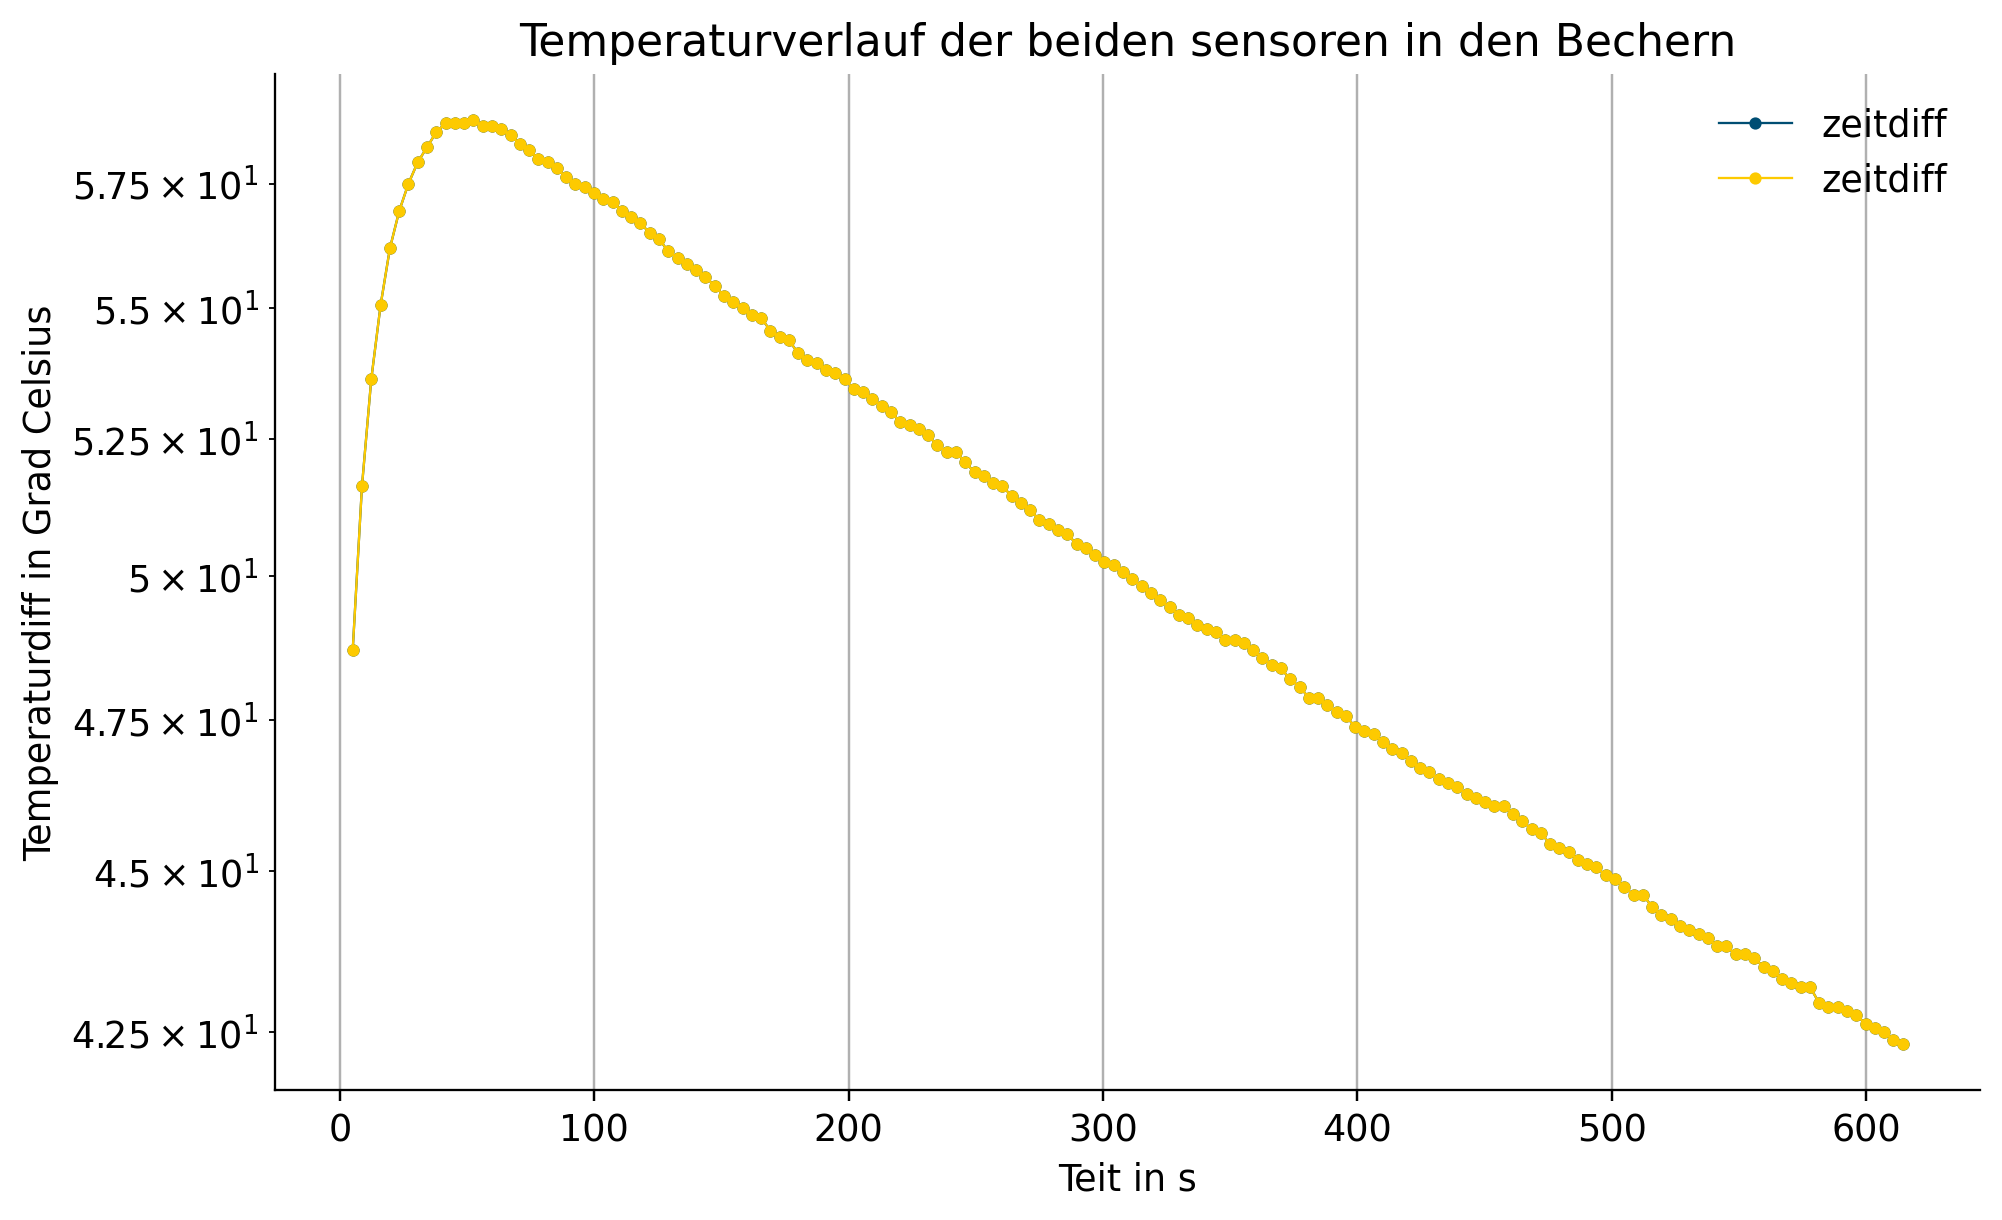

<Figure size 1471.8x1012 with 0 Axes>

In [17]:
# TODO: Use the temperature and time data for plotting
import matplotlib.pyplot as plt
import numpy as np

#Daten extrahieren
sensor1_uuid = '1ee826bc-ad10-6fa9-818b-5b87707a5a35'
sensor2_uuid = '1ee826c0-782e-69ed-9f87-e60f2d81be9d'

sensor1_data =sensor_data[sensor1_uuid]
sensor2_data =sensor_data[sensor2_uuid]

time1 = sensor1_data['timestamp']
temperature1 = sensor1_data['temperature']
#liste verkürzen
#temperature1.remove(-1)


time2 = sensor2_data['timestamp']
temperature2 = sensor2_data['temperature']
#listen der temperatur auf eine länge bringen
if len(temperature1) != len(temperature2):
    temperature1=np.delete(temperature1,-1)
temperature_diff = temperature2-temperature1

#Plot erstellen
plt.figure(figsize=(10,6))
plt.plot(time2, temperature_diff, label='zeitdiff', marker='.')
plt.plot(time2, temperature_diff, label='zeitdiff', marker='.')

#y-Achse logarithmisch
plt.yscale('log')
#Achsentitel und Diagrammtitel hinzufügen        
plt.xlabel('Teit in s')
plt.ylabel('Temperaturdiff in Grad Celsius')
plt.title('Temperaturverlauf der beiden sensoren in den Bechern')
#Legende hinzufügen
plt.legend()
#gitter hinzufügen
plt.grid(True)
#diagramm zeigen
plt.show()
#speichern des Graphen als svg
plt.savefig('Temperaaturverläufe_der_Gefäße')
# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [20]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz
import numpy as np
#Anfangswert T_1 h2o
T_1 = temperature2[0]
#Umgebungstemperatur T_2
T_2 = temperature1[0]

#den natürlichen logarithmus der Gleichung ,auf der linken seite, nehmen
log_temperature_diff = np.log(temperature_diff)

#polyfitfkt mit daten befüllen
coefficients=np.polyfit(timestamp, log_temperature_diff-np.log(T_1-T_2),1)

#K aus Koeffs ablesen
K = coefficients[0]

#vorrausgesagte temp für letzten zeitpunkt berechnen
t = timestamp[-1]
T_end_calc = (T_1-T_2)*np.exp(K*t)+T_2

#die gemesssene temp bei t 
T_end_exp =temperature2[-1]

# DONE #

#### (iV) Ergebnis

In [22]:
# TODO: Print result
print("Experiment Informationen:Autor", authors,"Gruppe",group_number,"durchgeführt am", created_date)
print("Der Transportkoeffizient beträgt",K,"1/s")
print("Die Temperatur am ende der Messung mithilfe des NewtonischenAbkühlgesetzes beträgt(in Grad Celsius):", T_end_calc,"und die Temperatur anhand der messung beträgt",T_end_exp)

# DONE #

Experiment Informationen:Autor Moritz Roth Gruppe None durchgeführt am 2023-11-19 15:45:08
Der Transportkoeffizient beträgt -0.0005531001084941282 1/s
Die Temperatur am ende der Messung mithilfe des NewtonischenAbkühlgesetzes beträgt(in Grad Celsius): 56.78674589258803 und die Temperatur anhand der messung beträgt 64.375


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Das Newtonische Abkühlungsgesetz kann bestätigt ,trotz einer differenz von ca acht Grad. Dies liegt an getroffenen Vereinfachungen wie Beispielsweise das die Umgebungstemperatur als konstant angenommen wurde und keine Wärmequellen beachtet werden. Trotzdem ist der relative Fehler schon etwas größer wodurch das Gesetz keine all zu gute Näherung ist

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Der zweite Versuch war für mich interessant da man die Möglichkeit hatte ein bestehendes Gesetz anhand eines eigenen Messversuchs nachweissen kann. Außerdem habe ich durch diessen Versuch meine Programmierkenntnisse auf dem PI verbessen und mein thermodynamischen Kenntnisse nochmal auffischen.